## Building a Stock Candlestick Chart Using Python

The purpose of this notebook is to use python to build a candlestick stock chart. In the script, we will pull historical stock data from the Yahoo Finance API and use several python libraries to organize and visualize the data. 

This is based on a Medium article you can view here: https://levelup.gitconnected.com/creating-candlestick-plots-for-stocks-50c35b1573aa

In [1]:
# imports

import time
from datetime import datetime
import pandas as pd

In [6]:
# initialize date values

# jan 1, 2020
dt = datetime(2020, 1, 1)
start_date = int(round(dt.timestamp()))

# mar 31, 2020
dt = datetime(2020, 3, 31)
end_date = int(round(dt.timestamp()))

# go with Google stock ticker
stock = 'GOOG'

In [7]:
# pull the data from yahoo finance's api

df = \
pd.read_csv(f"https://query1.finance.yahoo.com/v7/finance/download/{stock}?period1={start_date}&period2={end_date}&interval=1d&events=history&includeAdjustedClose=true",
           parse_dates = ['Date'], index_col = ['Date'])

# inspect the df head
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600
2020-01-03,1347.859985,1372.500000,1345.543945,1360.660034,1360.660034,1186400
2020-01-06,1350.000000,1396.500000,1350.000000,1394.209961,1394.209961,1732300
2020-01-07,1397.939941,1402.989990,1390.380005,1393.339966,1393.339966,1502700
2020-01-08,1392.079956,1411.579956,1390.839966,1404.319946,1404.319946,1528000


In [9]:
# check out the size of the df and the column data types

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2020-01-02 to 2020-03-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       61 non-null     float64
 1   High       61 non-null     float64
 2   Low        61 non-null     float64
 3   Close      61 non-null     float64
 4   Adj Close  61 non-null     float64
 5   Volume     61 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 3.3 KB


In [10]:
# review simple descriptive stats

df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,61.000000,61.000000,61.000000,61.000000,61.000000,6.100000e+01
mean,1356.806228,1377.638438,1337.807437,1360.158847,1360.158847,2.289802e+06
std,147.420931,136.711994,156.005974,145.327775,145.327775,1.020275e+06
min,1056.510010,1071.319946,1013.536011,1056.619995,1056.619995,9.295000e+05
25%,1260.000000,1281.150024,1218.770020,1280.390015,1280.390015,1.419900e+06
50%,1426.109985,1434.928955,1410.270020,1419.829956,1419.829956,1.986200e+06
75%,1462.910034,1482.000000,1458.219971,1476.229980,1476.229980,3.036800e+06
max,1525.069946,1532.105957,1521.400024,1526.689941,1526.689941,4.252400e+06


## Simple Price Plot

Build a simple plot of the historical stock price using matplotlib.

In [12]:
import matplotlib.pyplot as plt

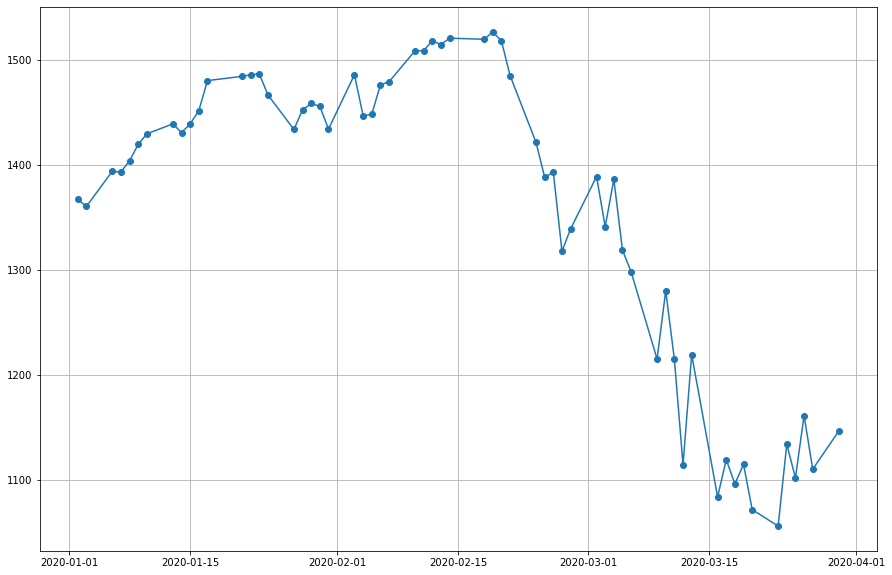

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(df.index, df['Close'], '-o')
ax.grid(True)

## Gridlines

Note that the x-axis plots the 1st and 15th of each month, which is not based on actual trading days. Let's try to modify this simple chart so the x-axis is formatted based on actual trading days.

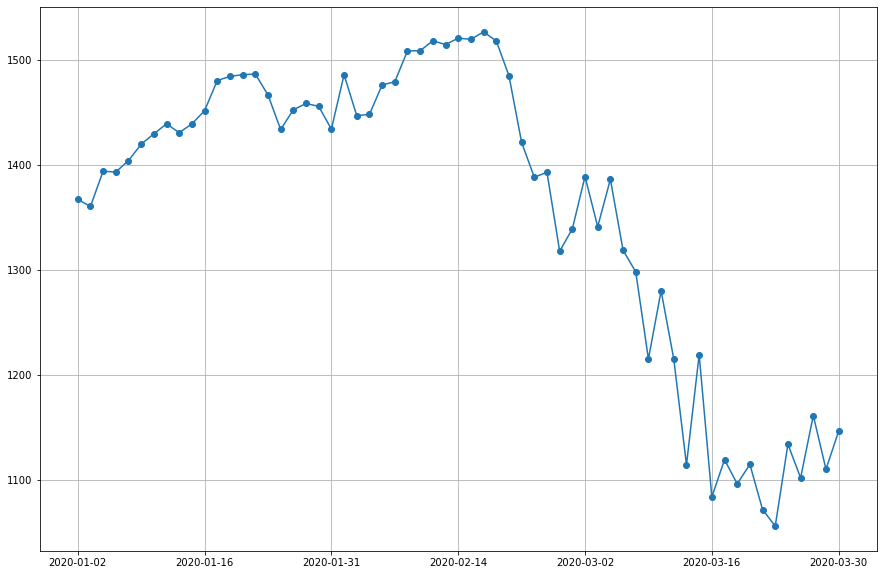

In [18]:
from matplotlib.ticker import Formatter
from matplotlib.dates import num2date
import numpy as np

rows = len(df)
indices = np.arange(rows)

# create a helper function to format the date
def format_date(x, pos = None):
    i = np.clip(int(x + 0.5), 0, rows - 1)
    return df.index[i].strftime('%Y-%m-%d')

# per the pandas dox, strftime() converts to Index using specified date_format

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(indices, df['Close'], '-o')
ax.xaxis.set_major_formatter(format_date)
ax.grid(True)

## Plotting Candlestick Chart using matplotlib

There are number of libraries that you can use to plot a candlestick plot. But let’s start with the basics — plotting one using matplotlib. 

Here are the steps:
* From the dataframe, get all the rows that are bullish (where their closing price is greater than or equal to the opening price)

* Get all the rows that are bearish (where their closing price is lesser than the opening price)

* Plot the real body of the bullish and bearish rows

* Plot the wicks of the bullish and bearish rows

The candlestick chart consists of the open, close, high, low for the day where:

* Real body — the rectangle showing the movements of the price from open to close. Typically green is used to represent an upward movement of price (bullish) and red is used to represent a downward movement in price (bearish).
* Wicks — the sticks above and below the open and close prices. These sticks represent the high and low prices of the stock during the particular trading day. The lengths of the sticks are called upper shadow and lower shadow.

In [21]:
# find the rows that are bullish
dfup = df[df.Close>=df.Open]

# find the rows that are bearish
dfdown = df[df.Close < df.Open]

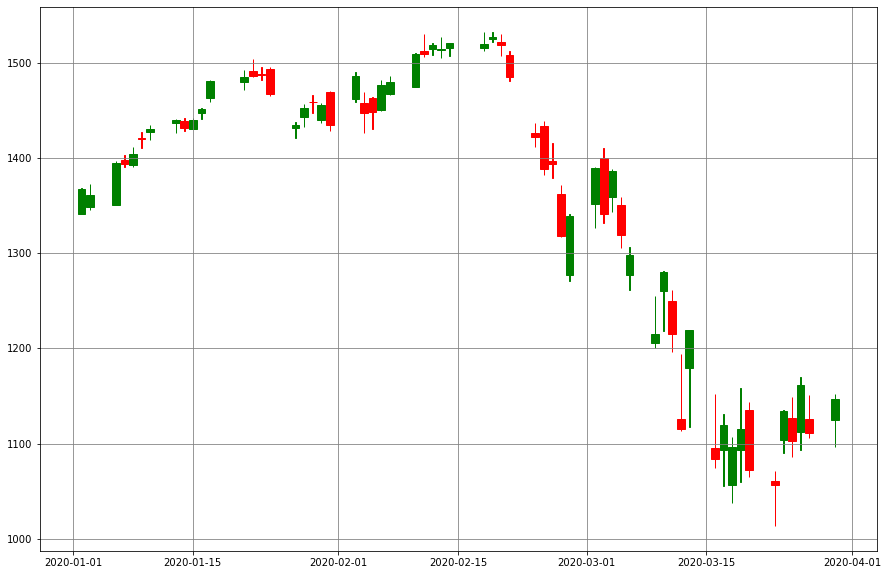

In [34]:
width  = 0.9   # width of real body
width2 = 0.05  # width of shadow
fig, ax = plt.subplots(figsize=(15,10))

#ax.plot(df.index, df['Close'], '-x')

# plot the bullish candle stick
ax.bar(dfup.index, dfup.Close - dfup.Open, width,
      bottom = dfup.Open, edgecolor='g', color='green')
ax.bar(dfup.index, dfup.High - dfup.Close, width2,
      bottom = dfup.Close, edgecolor='g', color='green')
ax.bar(dfup.index, dfup.Low - dfup.Open, width2,
      bottom = dfup.Open, edgecolor='g', color='green')

# plot the bearish candle stick
ax.bar(dfdown.index, dfdown.Close - dfdown.Open, width,
      bottom = dfdown.Open, edgecolor='r', color='red')
ax.bar(dfdown.index, dfdown.High - dfdown.Open, width2,
      bottom = dfdown.Open, edgecolor='r', color='red')
ax.bar(dfdown.index, dfdown.Low - dfdown.Close, width2,
      bottom = dfdown.Close, edgecolor='r', color='red')

ax.grid(color='gray')